In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import asarray 

In [ ]:
# load the image as pixel array
filepath = "test_hole.png"
img = Image.open(filepath)


# summarize image details
print(img.format)
print(img.mode)
print(img.size)
asarray(img)

In [10]:
list1 = [1, 2, 4]
list2 = [4, 5, 6]


dd = [i for i, item in enumerate(list1) if item not in set(list2)]
c = [list1[i] for i in dd]
c

[1, 2]

In [ ]:
import cv2 # Import the OpenCV library
import numpy as np

filepath = "test_hole.png"
image = cv2.imread(filepath)
image_mark = image.copy()
# define range of white color in HSV
lower_white = np.array([0,0,255])
upper_white = np.array([255,255,255])

# Create the mask
mask = cv2.inRange(image_mark, lower_white, upper_white)

# Create the inverted mask
mask_inv = cv2.bitwise_not(mask)

# Convert to grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract the dimensions of the original image
rows, cols, channels = image.shape
image = image[0:rows, 0:cols]

# Bitwise-OR mask and original image
colored_portion = cv2.bitwise_or(image, image, mask = mask)
colored_portion = colored_portion[0:rows, 0:cols]

# Bitwise-OR inverse mask and grayscale image
gray_portion = cv2.bitwise_or(gray, gray, mask = mask_inv)
gray_portion = np.stack((gray_portion,)*3, axis=-1)

# Combine the two images
output = colored_portion + gray_portion

# Save the image
OUTPUT_IMAGE = "test_hole_mask.jpg"
cv2.imwrite(OUTPUT_IMAGE, output)

In [26]:
OUTPUT_IMAGE = "test_hole_mask.jpg"
os.path.splitext(OUTPUT_IMAGE)

('test_hole_mask', '.jpg')

In [28]:
l=os.listdir(os.getcwd())
li=[x.split('.')[0] for x in l]
print(li)

['blue_blob_contour', 'blue_blob_thresh', 'Exercise_-_ML_Engineer_-_Hole_Filling', 'fill_hole_funcs', 'testim', 'testim2', 'test_hole', 'test_hole_mask', '__pycache__']


In [29]:
l

['blue_blob_contour.png',
 'blue_blob_thresh.png',
 'Exercise_-_ML_Engineer_-_Hole_Filling.pdf',
 'fill_hole_funcs.py',
 'testim.ipynb',
 'testim2.ipynb',
 'test_hole.png',
 'test_hole_mask.jpg',
 '__pycache__']

In [54]:
def list_files( path=os.getcwd()):
    """
    get a path and list all the git/png/jpg files
    input: 
    path - full path to directory (default is current directory)
    output:
    files_list - list of all the relevant files with their full paths
    fileNames_list - list of all the file names without extensions
    """
    from glob import glob
    import os

    # test if the path input is a file or directory
    if os.path.isdir(path) == True:
        files_list = glob(path +'/*.gif')
        files_list.extend(glob(path +'/*.png'))
        files_list.extend(glob(path +'/*.jpg'))
        fileNames_list=[os.path.basename(x).split('.')[0] for x in files_list]
        return(files_list, fileNames_list)

    elif os.path.isfile(path) == True:
        filename = os.path.basename(path)
        return(path, filename)

    else:
        raise Exception("File or path were not provided corectly!")

In [55]:
list_files('c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\blue_blob_contour.png')

('c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\blue_blob_contour.png',
 'blue_blob_contour.png')

In [57]:
list_files()


(['c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\blue_blob_contour.png',
  'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\blue_blob_thresh.png',
  'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\test_hole.png',
  'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\mask_test_hole.jpg',
  'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\test_hole_mask.jpg'],
 ['blue_blob_contour',
  'blue_blob_thresh',
  'test_hole',
  'mask_test_hole',
  'test_hole_mask'])

In [67]:
def getMaskFile(org_filepath, maskPath=None):
    """
    load the mask image under the assumption the name of the mask image is the same with additional prefix of "mask_imgName"
    input:
    - maskPath - (optional) - unique path to mask file directory
    """
    import cv2 # Import the OpenCV library

    org_path, org_fileName = list_files(path=org_filepath) # get the original image file name 
    mask_fileName = 'mask_'+ org_fileName.split('.')[0] # remove extension from file name and modify for mask version
    
    # when maskPath provided:
    if maskPath != None: 
        if os.path.isdir(maskPath) == True:
            files_paths, namesList = list_files(path=maskPath) # list files on the mask path 
            x = namesList.index(mask_fileName)
            maskFile = files_paths[x]
            mask = cv2.imread(maskFile, 0) # loading as grayscale image
            print("the file {0} was loaded".format(maskFile))
            return(mask)
        elif os.path.isfile(maskPath) == True:
            mask = cv2.imread(maskPath, 0) # direct loading as grayscale image
            return(mask)
        else:
            raise Exception("Maskpath parameters was not defined corectly")

    # when all masks files are stored together with original images     
    else: 
        files_paths, namesList = list_files(os.path.dirname(org_filepath))
        x = namesList.index(mask_fileName)
        maskFile = files_paths[x]
        mask = cv2.imread(maskFile, 0) # loading as grayscale image
        print("the file {0} was loaded".format(maskFile))
        return(mask)

In [68]:
myfile = 'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\test_hole.png'
maskspath = 'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\masks'
mymaskImage = getMaskFile(myfile, maskspath)

the file c:\gitHub\Learning_and_Training\filling_holes_in_images\masks\mask_test_hole.jpg was loaded


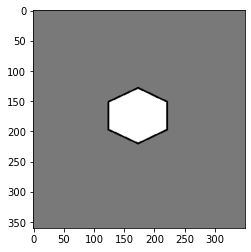

In [69]:
plt.imshow(mymaskImage, cmap='gray')

In [49]:
from glob import glob
dir_path =o s.getcwd()
files_list = glob(dir_path+'/*.gif')
files_list.extend(glob(dir_path+'/*.png'))
files_list.extend(glob(dir_path+'/*.jpg'))
fileNames_list=[os.path.basename(x).split('.')[0] for x in files_list]
print(files_list)
print('*******************************************\n')
print(fileNames_list)

['c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\blue_blob_contour.png', 'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\blue_blob_thresh.png', 'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\test_hole.png', 'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\mask_test_hole.jpg', 'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\test_hole_mask.jpg']
*******************************************

['blue_blob_contour', 'blue_blob_thresh', 'test_hole', 'mask_test_hole', 'test_hole_mask']


In [47]:
fileName='c:\\gitHub\\Learning_and_Training\\filling_holes_in_images'
os.path.isdir(fileName)

True

In [51]:
import os
mypath = 'c:\\gitHub\\Learning_and_Training\\filling_holes_in_images\\blue_blob_contour.png'
print(os.path.dirname(mypath))


c:\gitHub\Learning_and_Training\filling_holes_in_images


In [40]:
fileName='test_hole.png'
mask_fileName = 'mask_'+fileName
mask_fileName = mask_fileName.split('.')[0]
x = li.index(mask_fileName)
maskFile = files[x]
print(maskFile)

mask_test_hole.jpg


In [ ]:
# list the directory
path = os.getcwd()
l_dir=os.listdir(os.getcwd())


## Working prototype

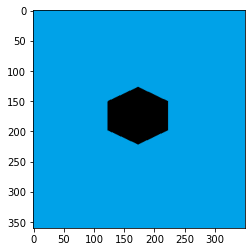

In [70]:

import cv2 # Import the OpenCV library
import numpy as np
filepath = "test_hole.png"
image = cv2.imread(filepath)

# load mask image
mask = cv2.imread("blue_blob_thresh.png", 0) # loading as garyscale image

# get the boudary coordinates using contour detection
b_coords = boundaryDetect8(mask)

# get hole coordinates (x,y)
xy_coords = np.flip(np.column_stack(np.where(mask > 0)), axis=1)

# fill the hole
img=image.copy()
for u in xy_coords:
    wz_iv_list = []
    wz_list = []
    for v in b_coords :
        vx=v[0]
        vy=v[1]
        iv = img[vy,vx] 
        wz = defaultWeight_func(v=v, u=u)
        wz_iv_list.append(wz*iv)
        wz_list.append(wz)
    
    iu = sum(wz_iv_list)/sum(wz_list)
    img[u[1],u[0]] = iu

# show results
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## End of prototype

In [3]:
# fill point function
def fill_pixel(x, y, channels=3, **kwargs):
    """
    applying a fill algorithm on image coordinate
    input:
    x - the x coordinate of the target pixel
    y - the y coordinate of the targert pixel
    channels - number of channels in the image (either 1 or 3)
    """
    # validating number of requested channels 
    if channels not in [1,3]:
        raise Exception("The fill pixel method supports only a single channel image or a 3 channels image!\n you defined {0} ".format(channels))
    elif channels == 1:
        val = 210.0 # single channel image fill return float
    elif channels == 3:
        val = (0, 0, 255) # 3 channels image filled as RGB return tuple

    return(img)
    


In [88]:
def displayArgument(**args):  
    print(args['z'] + args['epsilon'])
    for arg in args.items(): 
        print(arg) 

In [93]:
import json
f = open("weight_conf.json")
weight_conf = json.load(f)

displayArgument(**tuple(sorted(weight_conf.items())))

TypeError: displayArgument() argument after ** must be a mapping, not tuple

In [91]:
tuple(sorted(weight_conf.items()))

(('epsilon', 0.01), ('z', 1))

In [94]:
class HDict(dict):
    def __hash__(self):
        return hash(frozenset(self.items()))

substs = HDict({'foo': 'bar', 'baz': 'quz'})
cache = {substs: True}

In [96]:
def freezeargs(func):
    """Transform mutable dictionnary
    Into immutable
    Useful to be compatible with cache
    """

    @functools.wraps(func)
    def wrapped(*args, **kwargs):
        args = tuple([frozendict(arg) if isinstance(arg, dict) else arg for arg in args])
        kwargs = {k: frozendict(v) if isinstance(v, dict) else v for k, v in kwargs.items()}
        return func(*args, **kwargs)
    return wrapped

In [4]:
def defaultWeight_func(v, u, z=1, epsilon=0.01):
    """
    input:
    u - coordinate in hole
    v - coordinate in boundary
    z - integer factor 
    epsilon - small float value used to avoid division by 0
    output:
    wz - non-negative float weight
    """
    import numpy as np 

    dist = np.linalg.norm(u-v)
    wz = 1.0/((dist**z)+epsilon)
    return(wz)

In [ ]:
def fill_color():
    """
    input:
    img - the image
    u - coordinate in hole
    v - coordinate in boundary
    z - integer factor 
    epsilon - small float value used to avoid division by 0
    """
    

In [8]:
b_coords = boundaryDetect8(mask)

In [14]:
def fill_the_hole(img, xy_coords, b_coords, weightFunc=defaultWeight_func):
    """
    inputs:
    img - the image we wish to modify
    xy_coords - the hole xy coordinates array
    b_coords  - the boundary xy coordinates array
    weightFunc - weight function to calculate the fill value(optional)
    """
    for u in xy_coords:
        wz_iv_list = []
        wz_list = []
        for v in b_coords :
            vx=v[0]
            vy=v[1]
            iv = img[vy,vx] 
            wz = defaultWeight_func(v=v, u=u)
            wz_iv_list.append(wz*iv)
            wz_list.append(wz)
        
        iu = sum(wz_iv_list)/sum(wz_list)
        img[u[1],u[0]] = iu
        return(img)

In [20]:
img=image.copy()
for u in xy_coords:
    wz_iv_list = []
    wz_list = []
    for v in b_coords :
        vx=v[0]
        vy=v[1]
        iv = img[vy,vx] 
        wz = defaultWeight_func(v=v, u=u)
        wz_iv_list.append(wz*iv)
        wz_list.append(wz)
    
    iu = sum(wz_iv_list)/sum(wz_list)
    img[u[1],u[0]] = iu


In [15]:
newImage = fill_the_hole(img=image, xy_coords = xy_coords, b_coords = b_coords)

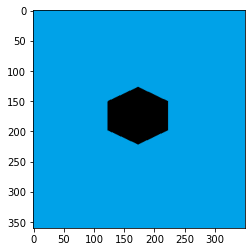

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
# works! 4 - connected
def boundaryDetect4(img_mask):
    """
    get a single chanel binary mask image and return the boundary pixels coordinates
    input: 
    img_mask - the mask of an image
    output:
    list of coordinates arrays ordered as [x,y]
    """
    b_list=[]
    cols, rows = img_mask.shape
    for y in range(cols-1):
        for x in range(rows-1):
            if img_mask[y,x]==0:
                if img_mask[y,x+1]>0:
                    b_list.append([x,y])
                elif img_mask[y,x-1]>0:
                    b_list.append([x,y])
                elif img_mask[y+1,x]>0:
                    b_list.append([x,y])
                elif img_mask[y-1,x]>0:
                    b_list.append([x,y])
    return(b_list)


In [7]:
# works! 8 - connected
def boundaryDetect8(img_mask):
    """
    get a single chanel binary mask image and return the boundary pixels coordinates
    input: 
    img_mask - the mask of an image
    output:
    list of coordinates arrays ordered as [x,y]
    """
    b_list=[]
    cols, rows = img_mask.shape
    for y in range(cols-1):
        for x in range(rows-1):
            if img_mask[y,x]==0:
                if img_mask[y,x+1]>0:
                    b_list.append([x,y])
                elif img_mask[y,x-1]>0:
                    b_list.append([x,y])
                elif img_mask[y+1,x]>0:
                    b_list.append([x,y])
                elif img_mask[y-1,x]>0:
                    b_list.append([x,y])
                elif img_mask[y-1,x-1]>0:
                    b_list.append([x,y])
                elif img_mask[y+1,x-1]>0:
                    b_list.append([x,y])
                elif img_mask[y-1,x+1]>0:
                    b_list.append([x,y])
                elif img_mask[y+1,x+1]>0:
                    b_list.append([x,y])
    return(b_list)


In [ ]:
image[172,129]

In [ ]:
# fill the hole
temp_img = image.copy()
for i in b_list:
    x = i[0]
    y = i[1]
    temp_img[y,x] = (0, 0, 255)

# show results
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))

In [ ]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:

import cv2 # Import the OpenCV library
import numpy as np
filepath = "test_hole.png"
image = cv2.imread(filepath)

# load mask image
mask = cv2.imread("blue_blob_thresh.png", 0) # loading as garyscale image

# get the boudary coordinates using contour detection
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cntr = contours[0]


# get hole coordinates (x,y)
xy_coords = np.flip(np.column_stack(np.where(mask > 0)), axis=1)

# fill the hole
temp_img = image.copy()
for i in b_list:
    x = i[0]
    y = i[1]
    temp_img[y,x] = (0, 0, 255)

# show results
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))

In [ ]:
tuple(temp_img[60,50])

In [ ]:
[373, 231] in xy_coords

In [ ]:
mask = cv2.imread("blue_blob_thresh.png", 0) # loading as garyscale image
# get coordinates (x,y)
xy_coords = np.flip(np.column_stack(np.where(mask > 0)), axis=1)

In [ ]:
xy_coords

In [ ]:
temp_img = image.copy()
for i in xy_coords:
    x = i[0]
    y = i[1]
    temp_img[y,x] = (0, 0, 255)



In [ ]:
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))

In [ ]:
# get contours
mask = cv2.imread("blue_blob_thresh.png", 0) # loading as garyscale image
#mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
result = np.zeros_like(image)
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]
cntr = contours[0]
cv2.drawContours(result, [cntr], 0, (0,0,255), 1)

In [ ]:
# print number of points along contour
print('number of points: ',len(cntr))

print('')

# list contour points
for pt in cntr:
    print(pt)

# save resulting images
cv2.imwrite('blue_blob_thresh.png',mask)
cv2.imwrite('blue_blob_contour.png',result) 

# show thresh and contour   
#cv2.imshow("thresh", mask)
#cv2.imshow("result", result)

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
t_image = image.copy()
for i in cntr:
    t_image[i] == (0,0,255)

plt.imshow(cv2.cvtColor(t_image, cv2.COLOR_BGR2RGB))


In [ ]:
cv2.imshow(t_image)

In [ ]:
t_image[50,50] = (0, 0, 0)
plt.imshow(cv2.cvtColor(t_image, cv2.COLOR_BGR2RGB))

In [ ]:
# Initialize empty list
lst_intensities = []

# For each list of contour points...
for i in range(len(cntr)):
    # Create a mask image that contains the contour filled in
    cimg = np.zeros_like(image)
    cv2.drawContours(cimg, cntr, i, color=255, thickness=-1)

    # Access the image pixels and create a 1D numpy array then add to list
    pts = np.where(cimg == 255)
    lst_intensities.append(image[pts[0], pts[1]])


In [ ]:
def load_image_return_array(filepath):
    from PIL import Image
    from numpy import asarray 
    
    # load the image as Pillow object
    img = Image.open(filepath)

    # summarize image details
    print("image details:\n")
    print(img.format)
    print(img.mode)
    print(img.size)

    # convert to numpy array
    img_data = asarray(img)
    return(img_data)







In [ ]:
from  fill_hole_funcs import img_holes
filepath = "test_hole.png"
imgData = img_holes(filepath).load_image_return_array()
print(imgData)

In [94]:
import os
import pickle



def cached(cachefile, lst):
    """
    A function that creates a decorator which will use "cachefile" for caching the results of the decorated function "fn".
    """
    def decorator(fn):  # define a decorator for a function "fn"
        def wrapped(*args, **kwargs):   # define a wrapper that will finally call "fn" with all arguments   
            target_key = kwargs
            target_key = frozenset(target_key.items())
            print(target_key)  
            
            lst[target_key] = 'aatest'
            # if cache exists -> load it and return its content
            if os.path.exists(cachefile):
                    with open(cachefile, 'rb') as cachehandle:
                        print("using cached result from '%s'" % cachefile)
                        cache = pickle.load(cachehandle)
                        if target_key in cache:
                            return(cache[target_key])
            else:
                cache={}

            # execute the function with all arguments passed
            res = fn(*args, **kwargs)
            cache[target_key] = res
            # write to cache file
            with open(cachefile, 'wb') as cachehandle:
                print("saving result to cache '%s'" % cachefile)
                pickle.dump(cache, cachehandle)

            return res

        return wrapped

    return decorator   # return this "customized" decorator that uses "cachefile"

In [97]:
from time import sleep
global mydict 
mydict = {'t1':'test1','t2':'test2'}
@cached('slow_function_cache.pickle',mydict)
def my_slow_function(a,b):
    print(b)
    sleep(3)
    print(a)
    return(f"some result is {a+b}")


print(my_slow_function(a='dba',b='dss'))
print(mydict)


frozenset({('a', 'dba'), ('b', 'dss')})
dss
dba
saving result to cache 'slow_function_cache.pickle'
some result is dbadss
{'t1': 'test1', 't2': 'test2', frozenset({('a', 'dba'), ('b', 'dss')}): 'aatest'}


using cached result from 'slow_function_cache.pickle'


In [119]:
temp_cache == mycache

False

In [117]:
from  cachingPickle import cache_handler

global mycache 

temp_cache = mycache.copy()
# load pickle
ch = cache_handler('slow_function_cache.pickle')
mycache = ch.load_cache()

@ch.check_cache(mycache)
def my_slow_function(a,b):
    print(b)
    sleep(3)
    print(a)
    return(f"some result is {a+b}")

print(my_slow_function(a='dbav2212',b='dssv2212'))

if temp_cache != mycache:
    ch.store_cache_onDisk(loaded_cache=mycache)

dssv2212
dbav2212
None
saving result to cache 'slow_function_cache.pickle'


frozenset({('a', 'dba'), ('b', 'dss')})
using cached result from 'slow_function_cache.pickle'
some result is dbadss


In [120]:
with open("args.pickle", 'rb') as cachehandle:
    args = pickle.load(cachehandle)


In [ ]:
d = {"d":"h"}

In [131]:
cnt=0
for i in args[1:]:
    cnt += 1
    d[str('var'+cnt)] = tuple(i)

(173, 130)